# Bernstein-Vazirani-Algorithmus mit fester Eingabe

[Link](https://www.bing.com/videos/search?q=qiskit+abraham+asfaw+Bernstein+Vazirani&&view=detail&mid=E4B91E29244AE45DF39AE4B91E29244AE45DF39A&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dqiskit%2520abraham%2520asfaw%2520Bernstein%2520Vazirani%26qs%3Dn%26form%3DQBVDMH%26%3D%2525eIhren%2520Suchverlauf%2520verwalten%2525E%26sp%3D-1%26lq%3D0%26pq%3Dqiskit%2520abraham%2520asfaw%2520bernstein%2520vazirani%26sc%3D0-39%26sk%3D%26cvid%3D0B852B9E191D46ECA690B5EBE27BBD58%26ghsh%3D0%26ghacc%3D0%26ghpl%3D)

Stellen Sie sich folgende Situation vor: Auf Ihrem Computer ist eine Geheimzahl abgespeichert. Damit es nicht zu unübersichtlich wird, gehen wir von einer 4-Bit Dualzahl aus, z. B. $1001$. Wie geht der Computer vor, wenn er diese Geheimzahl auslesen soll? Er fragt den Speicher folgendermassen ab. Er vergleicht die Seicherzelle mit dem Wert $0001$. Ein AND-Gatter stellt Übereinstimmung fest und Notiert als erste Abfrage $0001$. Nun testet er das zeite Bit mit dem Vergleich mit $0010$. Das Ergebnis ist $0$, da keine Übereinstimmung vorliegt also notiert er für die zweite Abfrage $0000$. Ebeso mit der dritten Abfrage. Die letzte Abfrage mit $1000$ liefert wieder Übereinstimmung, also notiert er $1000$. Schliesslich zählt er alle Ergebnisse zusammen und erhält $1001$. Durch diese vier Abfragen hat er die Geheimzahl ausgelesen.

Wie ginge ein Quantencomputer vor, um die Geheimzahl auszulesen? Nun einem Quantencomputer genügt **ein** Durchgang (shot) um die Zahl auszulesen, vorausgesetzt, die Zahl ist im Quantencomputer entsprechend codiert. Wie muss die Zahl dazu codiert werden und wie sieht der Quantenschaltkreis dazu aus?


[Beispiel mit vorgegebener Zahl](#fest)

[Beispiel mit variabler Eingabe](#vari)


## Feste Eingabe <a name="fest"></a>

In [1]:
from qiskit import QuantumCircuit, execute, BasicAer

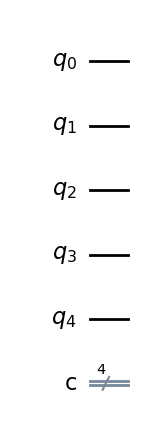

In [2]:
qc = QuantumCircuit(4+1,4)
qc.draw("mpl")

In [3]:
geheimzahl='1001'

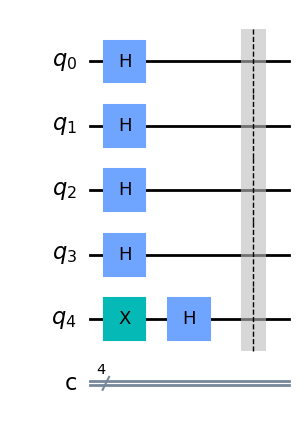

In [4]:
qc.h([0,1,2,3])
qc.x(4)
qc.h(4)

qc.barrier()
qc.draw("mpl")

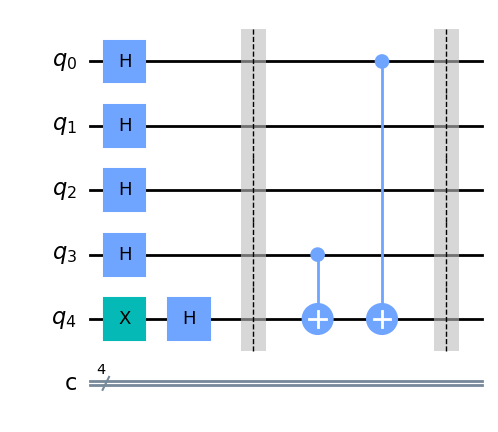

In [5]:
qc.cx(3,4)
qc.cx(0,4)


qc.barrier()
qc.draw("mpl")

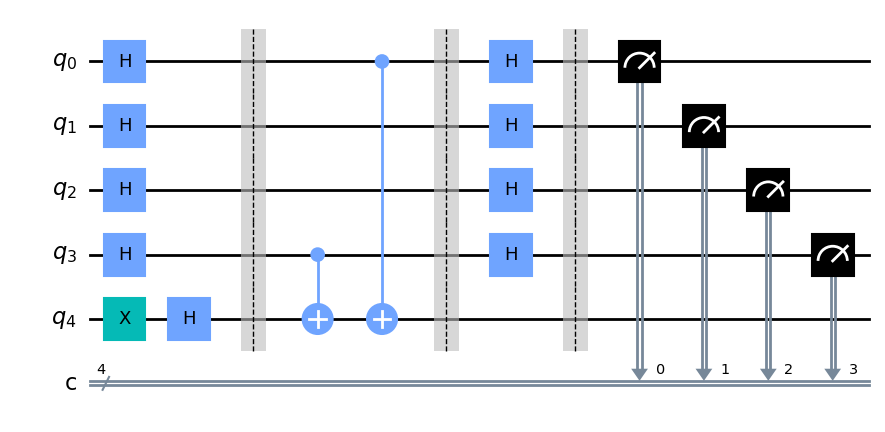

In [6]:
qc.h([0,1,2,3])

qc.barrier()

qc.measure([0,1,2,3],[0,1,2,3])

qc.draw("mpl")

In [7]:
simulator = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator).result()
counts = result.get_counts()
print(counts)

{'1001': 1024}
